In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor,RidgeCV
from sklearn import model_selection,metrics
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler,StandardScaler,minmax_scale
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor,RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")

In [159]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


## Clearning Outlier

(0.0, 800000.0)

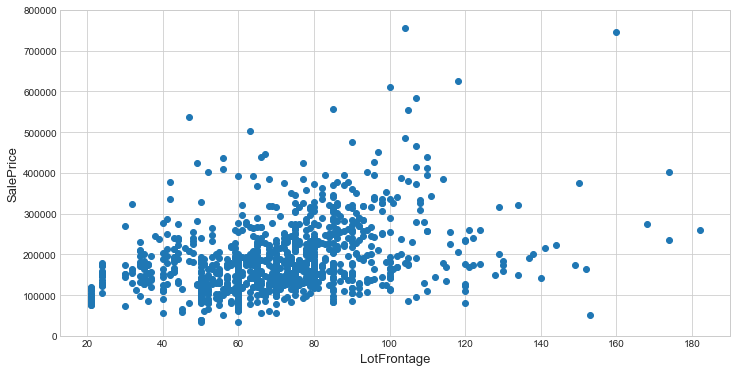

In [160]:
train.drop(train[(train["LotFrontage"]>300)&(train["SalePrice"]<300000)].index,inplace=True)
plt.figure(figsize=(12,6))
plt.scatter(x=train.LotFrontage, y=train.SalePrice)
plt.xlabel("LotFrontage", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

(0.0, 800000.0)

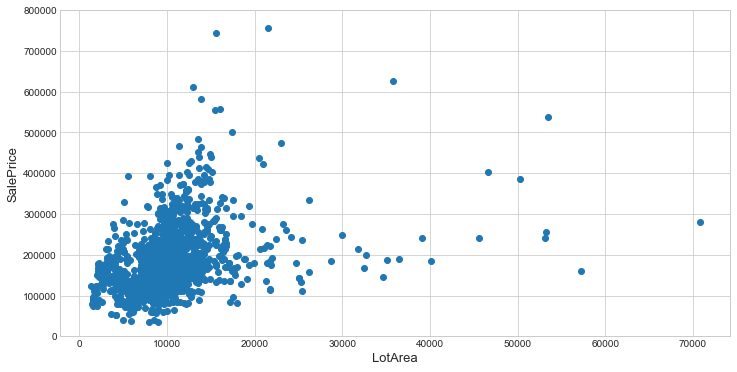

In [161]:
train.drop(train[(train["LotArea"]>100000)&(train["SalePrice"]<400000)].index,inplace=True)
plt.figure(figsize=(12,6))
plt.scatter(x=train.LotArea, y=train.SalePrice)
plt.xlabel("LotArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

(0.0, 800000.0)

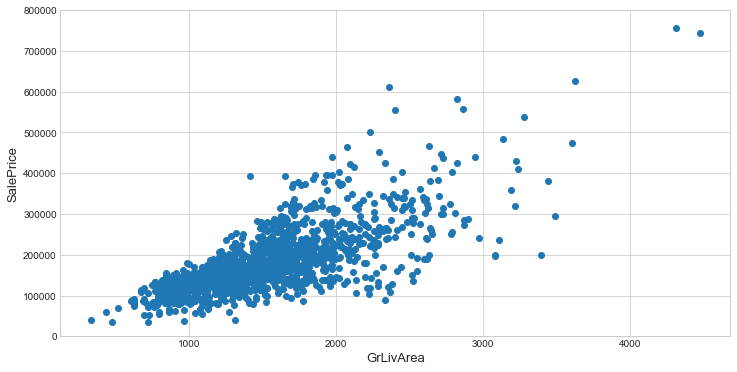

In [162]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [55]:
train.shape

(1453, 81)

In [56]:
test.shape

(1459, 80)

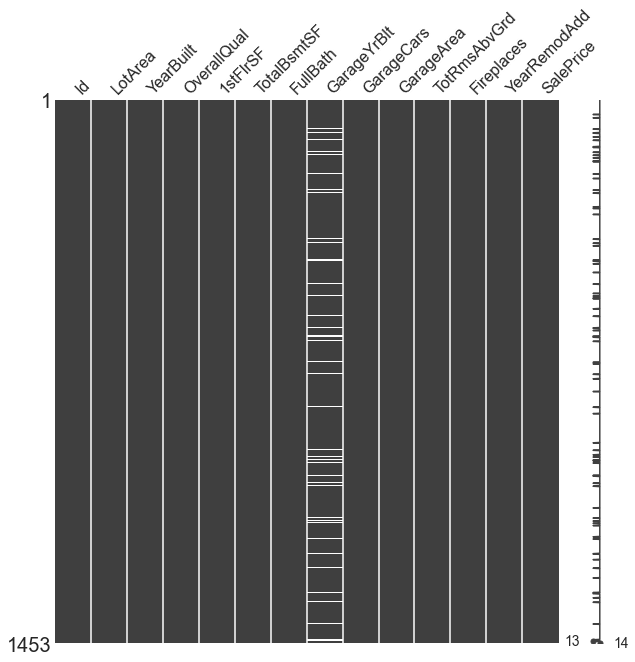

In [57]:
ax = missingno.matrix(train[List],figsize=(10,10))

In [163]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [164]:
def collect_data(dataset,name):
    res = pd.DataFrame()

    return res

feature_list = List
for name in List:
    if train[str(name)].isnull().sum() < 300:
        df_bin[str(name)] = train[str(name)]

df_bin

,Id,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,TotalBsmtSF,FullBath,GarageYrBlt,GarageCars,GarageArea,TotRmsAbvGrd,Fireplaces,YearRemodAdd,SalePrice
0,1,8450,2003,7,856,854,856,2,2003.0,2,548,8,0,2003,208500
1,2,9600,1976,6,1262,0,1262,2,1976.0,2,460,6,1,1976,181500
2,3,11250,2001,7,920,866,920,2,2001.0,2,608,6,1,2002,223500
3,4,9550,1915,7,961,756,756,1,1998.0,3,642,7,1,1970,140000
4,5,14260,2000,8,1145,1053,1145,2,2000.0,3,836,9,1,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,6,953,694,953,2,1999.0,2,460,7,1,2000,175000
1456,1457,13175,1978,6,2073,0,1542,2,1978.0,2,500,7,2,1988,210000
1457,1458,9042,1941,7,1188,1152,1152,2,1941.0,1,252,9,2,2006,266500
1458,1459,9717,1950,5,1078,0,1078,1,1950.0,1,240,5,0,1996,142125


(1453, 15)


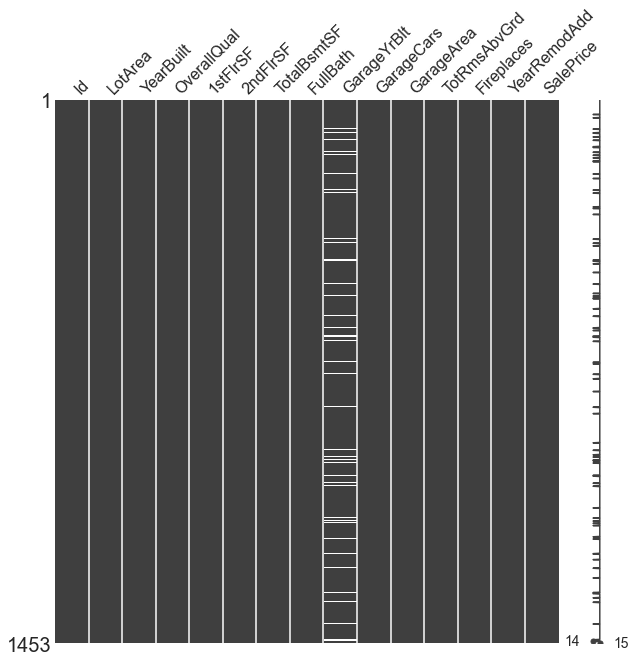

In [165]:
missingno.matrix(df_bin,figsize=(10,10))
print(df_bin.shape)

In [166]:
aa = df_bin.isnull().sum()
aa[aa>0].sort_values(ascending=False)

GarageYrBlt    81
dtype: int64

In [167]:
df_names = df_bin.columns.tolist()
for name in df_names:
    if df_bin[str(name)].isnull().sum() !=0:
        print(f"{df_bin[str(name)].dtype}-{name}:{df_bin[str(name)].isnull().sum()}")
        if df_bin[str(name)].dtype == 'object':
            df_bin[str(name)].fillna(df_bin[str(name)].mode()[0],inplace=True)
        elif df_bin[str(name)].dtype == 'float64':
            df_bin[str(name)].fillna(df_bin[str(name)].mean(),inplace=True)
            #df_bin[str(name)] = (df_bin[str(name)]-df_bin[str(name)].mean())
        elif df_bin[str(name)].dtype == 'int64':
            df_bin[str(name)].fillna(df_bin[str(name)].median(),inplace=True)
#df_bin.MasVnrArea.tolist()

float64-GarageYrBlt:81


(1453, 15)


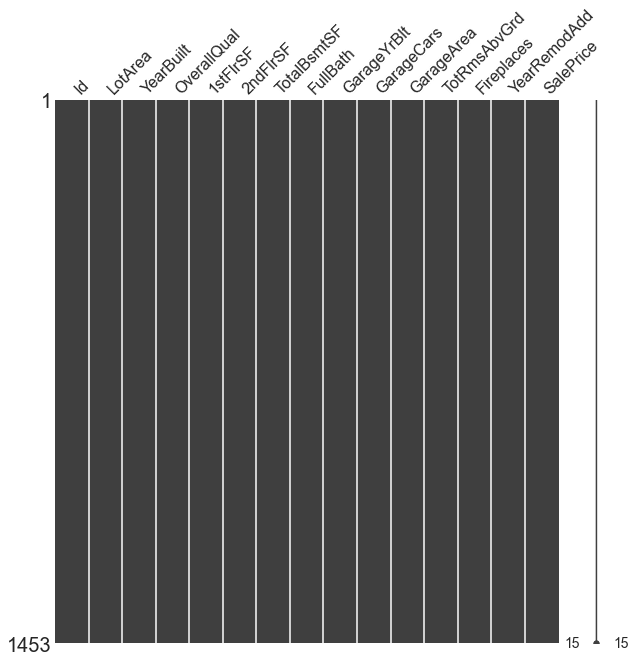

In [168]:
missingno.matrix(df_bin,figsize=(10,10))
print(df_bin.shape)

In [169]:
aa = df_bin.isna().sum()
if len(aa[aa>0]) == 0:
    print("Cleaning Done")
else:
    print("Cleaning still not enough...")

Cleaning Done


## Use heatmap to get the well performanced features

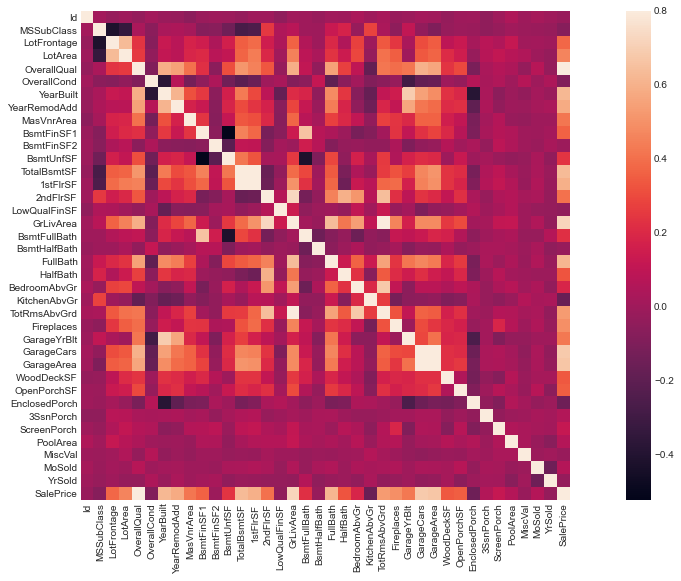

In [170]:
from sklearn import preprocessing

heatmap_all = train.copy()
for x in List:
    label = preprocessing.LabelEncoder()
    heatmap_all[x] = label.fit_transform(heatmap_all[x])
corrmat = heatmap_all.corr()
f = plt.figure(figsize=(20, 9))
ax = sns.heatmap(corrmat, vmax=0.8, square=True)

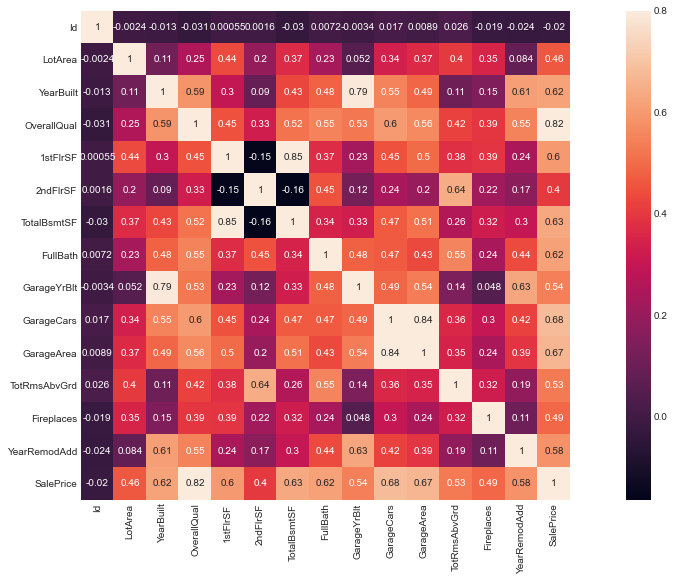

In [171]:
from sklearn import preprocessing
heatmap = df_bin.copy()
for x in List:
    label = preprocessing.LabelEncoder()
    heatmap[x] = label.fit_transform(heatmap[x])
corrmat = heatmap.corr()
f = plt.figure(figsize=(20, 9))
ax = sns.heatmap(corrmat, vmax=0.8, square=True,annot=True)

## Get the list of needed Features

In [172]:
List = ["Id","LotArea","YearBuilt","OverallQual","1stFlrSF","2ndFlrSF"
       ,"TotalBsmtSF","FullBath","GarageYrBlt","GarageCars","GarageArea","TotRmsAbvGrd","Fireplaces","YearRemodAdd","SalePrice"]
len(List)

15

In [173]:
test_filter = test[List[:-1]]

In [174]:
df_names = test_filter.columns.tolist()
for name in df_names:
    if test_filter[str(name)].isnull().sum() !=0:
        print(f"{test_filter[str(name)].dtype}-{name}:{test_filter[str(name)].isnull().sum()}")
        if test_filter[str(name)].dtype == 'object':
            test_filter[str(name)].fillna(method="ffill",inplace=True)
        elif test_filter[str(name)].dtype == 'float64':
            test_filter[str(name)].fillna(test_filter[str(name)].mean(),inplace=True)

float64-TotalBsmtSF:1
float64-GarageYrBlt:78
float64-GarageCars:1
float64-GarageArea:1


In [156]:
test_filter

,Id,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,TotalBsmtSF,FullBath,GarageYrBlt,GarageCars,GarageArea,TotRmsAbvGrd,Fireplaces,YearRemodAdd
0,1461,11622,1961,5,896,0,882.0,1,1961.000000,1.0,730.0,5,0,1961
1,1462,14267,1958,6,1329,0,1329.0,1,1958.000000,1.0,312.0,6,0,1958
2,1463,13830,1997,5,928,701,928.0,2,1997.000000,2.0,482.0,6,1,1998
3,1464,9978,1998,6,926,678,926.0,2,1998.000000,2.0,470.0,7,1,1998
4,1465,5005,1992,8,1280,0,1280.0,2,1992.000000,2.0,506.0,5,0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1970,4,546,546,546.0,1,1977.721217,0.0,0.0,5,0,1970
1455,2916,1894,1970,4,546,546,546.0,1,1970.000000,1.0,286.0,6,0,1970
1456,2917,20000,1960,5,1224,0,1224.0,1,1960.000000,2.0,576.0,7,1,1996
1457,2918,10441,1992,5,970,0,912.0,1,1977.721217,0.0,0.0,6,0,1992


In [175]:
aa = df_bin.drop("SalePrice",axis=1)
trys = pd.concat([test_filter,df_bin],axis=0,ignore_index=True)

name_lists = trys.columns.tolist()
test_filter_enc = pd.DataFrame()
one_hot_list = []

for name in name_lists:
    if len(trys[str(name)].value_counts()) < 30:
        #one_hot_list.append(str(name))
        tmp = pd.get_dummies(trys[str(name)],prefix=str(name).lower())
        test_filter_enc = pd.concat([test_filter_enc,tmp],axis=1)
    else:
        if str(name) != "Id":
            test_filter_enc[str(name)] = trys[str(name)]
        #print(str(name))

#df_bin_enc = pd.get_dummies(df_bin,columns=[str(name)])    
select_df = test_filter_enc
#select_test = test_filter_enc.iloc[1457:2916,:]
select_df = select_df.iloc[1459:,:]
select_df

,LotArea,YearBuilt,overallqual_1,overallqual_2,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,...,totrmsabvgrd_13,totrmsabvgrd_14,totrmsabvgrd_15,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,YearRemodAdd,SalePrice
1459,8450,2003,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,2003,208500.0
1460,9600,1976,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1976,181500.0
1461,11250,2001,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,2002,223500.0
1462,9550,1915,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1970,140000.0
1463,14260,2000,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,2000,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,7917,1999,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2000,175000.0
2908,13175,1978,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1988,210000.0
2909,9042,1941,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,2006,266500.0
2910,9717,1950,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1996,142125.0


## Get the trainData

In [176]:
X_train = select_df.drop("SalePrice",axis=1)
y_train = select_df.SalePrice

X_train

,LotArea,YearBuilt,overallqual_1,overallqual_2,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,...,totrmsabvgrd_12,totrmsabvgrd_13,totrmsabvgrd_14,totrmsabvgrd_15,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,YearRemodAdd
1459,8450,2003,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2003
1460,9600,1976,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1976
1461,11250,2001,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2002
1462,9550,1915,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1970
1463,14260,2000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,7917,1999,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2000
2908,13175,1978,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1988
2909,9042,1941,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2006
2910,9717,1950,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1996


In [94]:
def ml(algo,X_train,y_train,cv):
    #X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    model = algo.fit(X_train,y_train)
    #print(round(model.score(X_train,y_train)*100,2))
    
    #acc_cv = model_selection.cross_val_score(algo,X_train,y_train,cv=cv,n_jobs=-1)
#    kf = KFold(cv, shuffle=True, random_state=42).get_n_splits(X_train)
    acc_cv = np.sqrt(-model_selection.cross_val_score(algo, X_train, y_train, scoring="neg_mean_squared_error", cv=cv,n_jobs=-1))
    
    #acc_cv = round(((y_train-train_pred)**2).sum(),2)
    #print(train_pred,y_train)
    return acc_cv,model

## Loss Function

In [95]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-model_selection.cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

## Scala Options

In [140]:
scala = RobustScaler()
X_train_scala = scala.fit(X_train).transform(X_train)
y_train_scala = np.log(y_train)

In [177]:
scala = StandardScaler()
X_train_scala = scala.fit(X_train).transform(X_train)
y_train_scala = np.log(y_train)

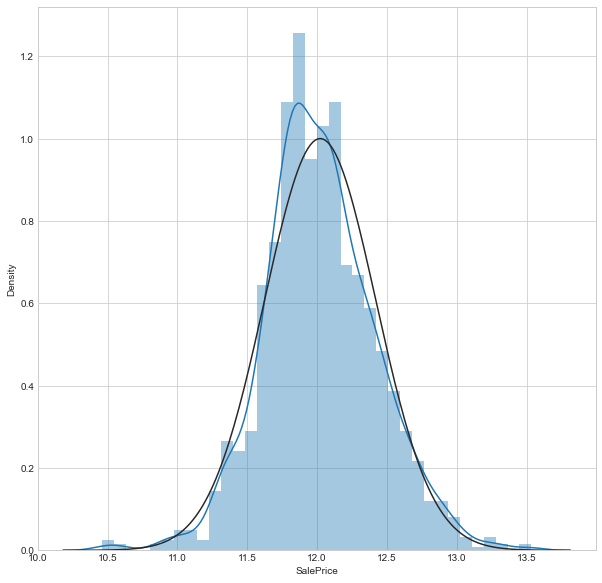

In [147]:
fig = plt.figure(figsize=(10,10))
ax = sns.distplot(np.log(train["SalePrice"]),fit=norm)

## PCA (If need)

In [92]:
#pca = PCA(n_components=400)
#X_train_PCA = pca.fit_transform(X_train)
#X_train_PCA.shape

## LinearRegression

In [100]:
acc_cv_lr,model_lr = ml(LinearRegression(),X_train_scala,y_train_scala,5)
print(acc_cv_lr.mean(),acc_cv_lr.std())

1377929880786.4006 2750631044903.784


## XGBRegressor

In [150]:
acc_cv_xgb,model_xgb =  ml(XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),X_train_scala,y_train_scala,5)
print(acc_cv_xgb.mean(),acc_cv_xgb.std())
#np.exp(model_xgb.predict(X_train_scala)).tolist()

[21:18:34] WARNING: ..\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.15748437281998914 0.007064970807598915


## Lasso

In [103]:
alphas = [0.001,0.005,0.01,0.02,0.03,0.04]
for alpha in alphas:
    acc_cv_lasso,model_lasso =  ml(Lasso(alpha=alpha),X_train_scala,y_train_scala,5)
    print(f"{alpha}:{acc_cv_lasso.mean()},{acc_cv_lasso.std()}")

0.001:0.15723063042111496,0.006579449915279809
0.005:0.15900329412179282,0.0070926107025148025
0.01:0.16352063535517405,0.00825651703008684
0.02:0.17396463418630043,0.008928842821916484
0.03:0.18792686817644982,0.008992716492352077
0.04:0.19967206083860495,0.008802077422724718


## Ridge

In [123]:
alphas = [0.001,0.005,0.01,0.02,0.03,0.04,0.1]
for alpha in alphas:
    acc_cv_Ridge,model_Ridge =  ml(Ridge(alpha=alpha),X_train_scala,y_train_scala,5)
    print(f"{alpha}:{acc_cv_Ridge.mean()},{acc_cv_Ridge.std()}")

0.001:0.1573335095225754,0.006493054293641638
0.005:0.1573334813673141,0.006493052645618456
0.01:0.1573334461819635,0.006493050587106707
0.02:0.15733337583905535,0.006493046472794843
0.03:0.15733330553307662,0.006493042361897566
0.04:0.15733323526401197,0.00649303825440647
0.1:0.1573328144239626,0.006493013680344876


## DecisionTree

In [106]:
acc_cv_dtr,model_dtr = ml(DecisionTreeRegressor(),X_train_scala,y_train_scala,5)
print(acc_cv_dtr.mean(),acc_cv_dtr.std())

0.2403831826865915 0.01550385814265886


## SVR

In [107]:
acc_cv_svr,model_svr = ml(SVR(),X_train_scala,y_train_scala,5)
print(acc_cv_svr.mean(),acc_cv_svr.std())

0.18858700851999655 0.017435441352661386


## Adaboost

In [117]:
acc_cv_ada,model_ada = ml(AdaBoostRegressor(random_state=0, n_estimators=100,learning_rate=0.1),X_train_scala,y_train_scala,5)
print(acc_cv_ada.mean(),acc_cv_ada.std())

0.20699745310001352 0.008143411306079857


## Stack

In [178]:
estimators = [
    ('lr', Ridge(alpha=0.1)),
    ('svr', SVR()),
    ('XGB',XGBRegressor())
    ]
acc_cv_stack,model_stack = ml(StackingRegressor(estimators=estimators,final_estimator=Ridge()),
                              X_train_scala,y_train_scala,5)
print(acc_cv_stack.mean(),acc_cv_stack.std())

0.14102718545958126 0.006040430612275189


## Get the predictions

(1459, 14)


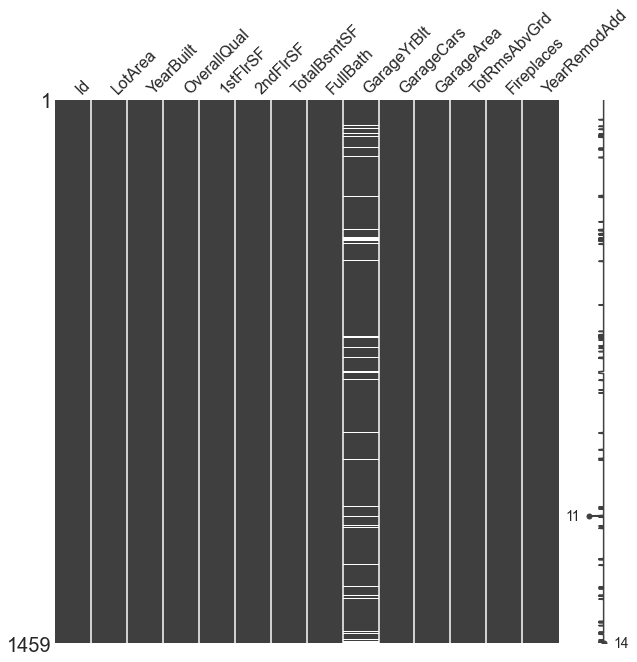

In [179]:
missingno.matrix(test[List[:-1]],figsize=(10,10))
print(test[List[:-1]].shape)

<AxesSubplot:>

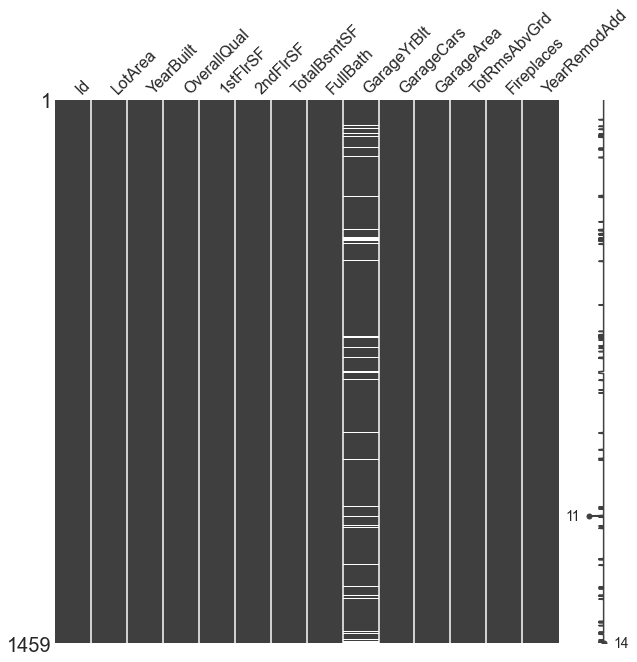

In [180]:
test_filter = test[List[:-1]]
test_filter
missingno.matrix(test_filter,figsize=(10,10))

In [181]:
df_names = test_filter.columns.tolist()
for name in df_names:
    if test_filter[str(name)].isnull().sum() !=0:
        print(f"{test_filter[str(name)].dtype}-{name}:{test_filter[str(name)].isnull().sum()}")
        if test_filter[str(name)].dtype == 'object':
            test_filter[str(name)].fillna(test_filter[str(name)].mode()[0],inplace=True)
        elif test_filter[str(name)].dtype == 'float64':
            test_filter[str(name)].fillna(test_filter[str(name)].mean(),inplace=True)

float64-TotalBsmtSF:1
float64-GarageYrBlt:78
float64-GarageCars:1
float64-GarageArea:1


(1459, 14)


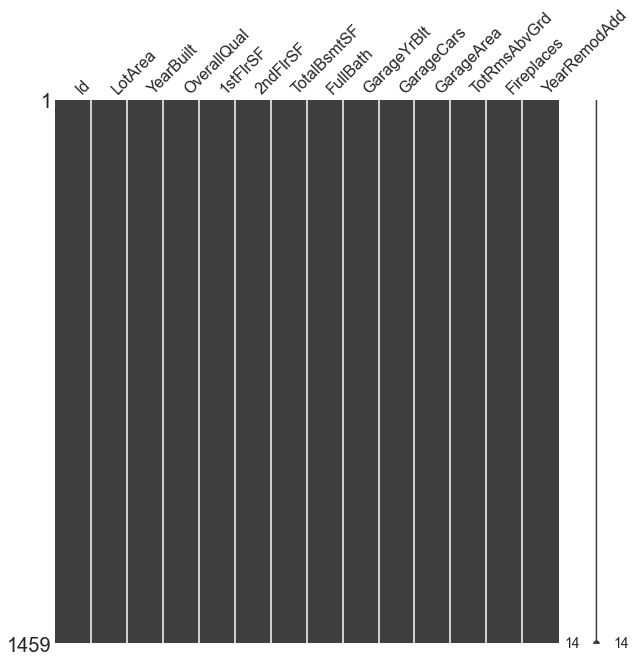

In [182]:
test_filter
missingno.matrix(test_filter,figsize=(10,10))
print(test_filter.shape)

In [183]:
test_filter

,Id,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,TotalBsmtSF,FullBath,GarageYrBlt,GarageCars,GarageArea,TotRmsAbvGrd,Fireplaces,YearRemodAdd
0,1461,11622,1961,5,896,0,882.0,1,1961.000000,1.0,730.0,5,0,1961
1,1462,14267,1958,6,1329,0,1329.0,1,1958.000000,1.0,312.0,6,0,1958
2,1463,13830,1997,5,928,701,928.0,2,1997.000000,2.0,482.0,6,1,1998
3,1464,9978,1998,6,926,678,926.0,2,1998.000000,2.0,470.0,7,1,1998
4,1465,5005,1992,8,1280,0,1280.0,2,1992.000000,2.0,506.0,5,0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1970,4,546,546,546.0,1,1977.721217,0.0,0.0,5,0,1970
1455,2916,1894,1970,4,546,546,546.0,1,1970.000000,1.0,286.0,6,0,1970
1456,2917,20000,1960,5,1224,0,1224.0,1,1960.000000,2.0,576.0,7,1,1996
1457,2918,10441,1992,5,970,0,912.0,1,1977.721217,0.0,0.0,6,0,1992


In [184]:
aa = df_bin.drop("SalePrice",axis=1)
trys = pd.concat([test_filter,df_bin],axis=0,ignore_index=True)

name_lists = trys.columns.tolist()
test_filter_enc = pd.DataFrame()
one_hot_list = []

for name in name_lists:
    if len(trys[str(name)].value_counts()) < 30:
        #one_hot_list.append(str(name))
        tmp = pd.get_dummies(trys[str(name)],prefix=str(name).lower())
        test_filter_enc = pd.concat([test_filter_enc,tmp],axis=1)
    else:
        if str(name) != "Id":
            test_filter_enc[str(name)] = trys[str(name)]
        #print(str(name))

#df_bin_enc = pd.get_dummies(df_bin,columns=[str(name)])    
select_test = test_filter_enc
#select_test = test_filter_enc.iloc[1457:2916,:]
select_test=select_test.iloc[:1459,:].drop("SalePrice",axis=1)
select_test

,LotArea,YearBuilt,overallqual_1,overallqual_2,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,...,totrmsabvgrd_12,totrmsabvgrd_13,totrmsabvgrd_14,totrmsabvgrd_15,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,YearRemodAdd
0,11622,1961,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1961
1,14267,1958,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1958
2,13830,1997,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1998
3,9978,1998,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1998
4,5005,1992,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,1970,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1970
1455,1894,1970,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1970
1456,20000,1960,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1996
1457,10441,1992,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1992


In [185]:
select_test_scale = scala.fit(select_test).transform(select_test)

In [186]:
pre = model_stack.predict(select_test_scale)
pre.shape

(1459,)

In [187]:
submission = pd.DataFrame()
submission["Id"] = test.Id
submission["SalePrice"] = np.exp(pre)
submission

,Id,SalePrice
0,1461,129579.557634
1,1462,152822.216227
2,1463,191607.216802
3,1464,187674.745342
4,1465,186839.512823
...,...,...
1454,2915,88099.565542
1455,2916,99570.266769
1456,2917,166626.732686
1457,2918,118650.764499


In [188]:
submission["SalePrice"] = submission["SalePrice"].astype(float)
submission.dtypes

Id             int64
SalePrice    float64
dtype: object

In [189]:
submission.to_csv("./Haus_submission.csv",index=False)